In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
df = pd.read_csv('../datasets/diabetes.csv')

In [32]:
df.shape

(768, 9)

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
# splitting data into independent and dependent variables
X = df.iloc[:, 0:8]
y = df["Outcome"] 
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (768, 8)
y shape:  (768,)


In [35]:
# standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (691, 8)
X_test shape:  (77, 8)
y_train shape:  (691,)
y_test shape:  (77,)


### Adam - Adaptive Moment Estimation
##### Accumulating the gradients by calculating momentum and also constantly changing the learning rate by using the cache. Due to these two features, Adam performs better than any other optimizer out there.

In [37]:
# define model
model_adam = models.Sequential()
model_adam.add(layers.Dense(100, activation="relu"))
model_adam.add(layers.Dense(50, activation="relu"))
model_adam.add(layers.Dense(25, activation="relu"))
model_adam.add(layers.Dense(12, activation="relu"))
model_adam.add(layers.Dense(1, activation="sigmoid"))

In [38]:
# adam optimizer 
model_adam.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [53]:
# train adam model
history_adam = model_adam.fit(X_train, y_train, epochs=15, verbose=2, validation_data=(X_test, y_test), validation_split=0.2)

Epoch 1/15
18/18 - 0s - loss: 0.3747 - accuracy: 0.8279 - val_loss: 0.5961 - val_accuracy: 0.7122 - 432ms/epoch - 24ms/step
Epoch 2/15
18/18 - 0s - loss: 0.3653 - accuracy: 0.8351 - val_loss: 0.6022 - val_accuracy: 0.7266 - 148ms/epoch - 8ms/step
Epoch 3/15
18/18 - 0s - loss: 0.3716 - accuracy: 0.8243 - val_loss: 0.6440 - val_accuracy: 0.7410 - 263ms/epoch - 15ms/step
Epoch 4/15
18/18 - 0s - loss: 0.3710 - accuracy: 0.8279 - val_loss: 0.6028 - val_accuracy: 0.7266 - 135ms/epoch - 8ms/step
Epoch 5/15
18/18 - 0s - loss: 0.3532 - accuracy: 0.8424 - val_loss: 0.6184 - val_accuracy: 0.7266 - 179ms/epoch - 10ms/step
Epoch 6/15
18/18 - 0s - loss: 0.3467 - accuracy: 0.8496 - val_loss: 0.6150 - val_accuracy: 0.7194 - 183ms/epoch - 10ms/step
Epoch 7/15
18/18 - 0s - loss: 0.3445 - accuracy: 0.8424 - val_loss: 0.6343 - val_accuracy: 0.7338 - 122ms/epoch - 7ms/step
Epoch 8/15
18/18 - 0s - loss: 0.3330 - accuracy: 0.8533 - val_loss: 0.6339 - val_accuracy: 0.7194 - 125ms/epoch - 7ms/step
Epoch 9/15
1

Text(0, 0.5, 'Accuracy')

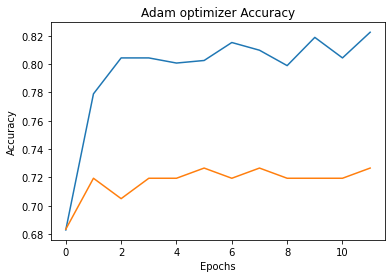

In [40]:
# plot accuracy
plt.plot(history_adam.history['accuracy'], label='accuracy')
plt.plot(history_adam.history['val_accuracy'], label='val_accuracy')
plt.title("Adam optimizer Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

### Adagrad - Adaptive Gradients
##### The Learning rate changes during each update in such a way that it will decrease if a weight is being updated too much in a short amount of time and it will increase if a weight is not being updated much.

In [ ]:
# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

In [41]:
# define model
model_adagrad = models.Sequential()
model_adagrad.add(layers.Dense(100, activation="relu"))
model_adagrad.add(layers.Dense(50, activation="relu"))
model_adagrad.add(layers.Dense(25, activation="relu"))
model_adagrad.add(layers.Dense(12, activation="relu"))
model_adagrad.add(layers.Dense(1, activation="sigmoid"))

In [42]:
# adam optimizer 
model_adagrad.compile(optimizer="Adagrad", loss="binary_crossentropy", metrics=["accuracy"])

In [43]:
# train adagrad model
history_adagrad = model_adagrad.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), validation_split=0.2)

Epoch 1/15
18/18 [==============================] - 1s 36ms/step - loss: 0.6998 - accuracy: 0.3895 - val_loss: 0.6986 - val_accuracy: 0.4388
Epoch 2/15
18/18 [==============================] - 0s 13ms/step - loss: 0.6987 - accuracy: 0.4239 - val_loss: 0.6978 - val_accuracy: 0.4676
Epoch 3/15
18/18 [==============================] - 0s 8ms/step - loss: 0.6978 - accuracy: 0.4275 - val_loss: 0.6970 - val_accuracy: 0.5180
Epoch 4/15
18/18 [==============================] - 0s 8ms/step - loss: 0.6971 - accuracy: 0.4438 - val_loss: 0.6964 - val_accuracy: 0.5468
Epoch 5/15
18/18 [==============================] - 0s 13ms/step - loss: 0.6964 - accuracy: 0.4620 - val_loss: 0.6958 - val_accuracy: 0.5540
Epoch 6/15
18/18 [==============================] - 0s 8ms/step - loss: 0.6957 - accuracy: 0.4801 - val_loss: 0.6952 - val_accuracy: 0.5683
Epoch 7/15
18/18 [==============================] - 0s 8ms/step - loss: 0.6951 - accuracy: 0.4928 - val_loss: 0.6947 - val_accuracy: 0.5755
Epoch 8/15
18/18 

Text(0, 0.5, 'Accuracy')

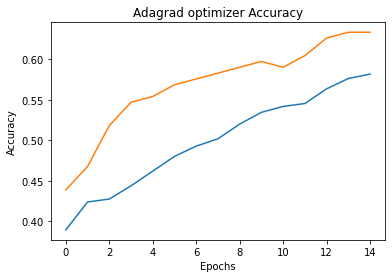

In [44]:
# plot accuracy
plt.plot(history_adagrad.history['accuracy'], label='accuracy')
plt.plot(history_adagrad.history['val_accuracy'], label='val_accuracy')
plt.title("Adagrad optimizer Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

### RMSprop
##### The learning rate changes constantly based on the weight being updated just like adagrad, but at same time the learning rate dows not decay too quickly.

In [ ]:
# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

In [45]:
# define model
model_rmsprop = models.Sequential()
model_rmsprop.add(layers.Dense(100, activation="relu"))
model_rmsprop.add(layers.Dense(50, activation="relu"))
model_rmsprop.add(layers.Dense(25, activation="relu"))
model_rmsprop.add(layers.Dense(12, activation="relu"))
model_rmsprop.add(layers.Dense(1, activation="sigmoid"))

In [46]:
# adam optimizer 
model_rmsprop.compile(optimizer="RMSprop", loss="binary_crossentropy", metrics=["accuracy"])

In [47]:
# train rmsprop model
history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), validation_split=0.2)

Epoch 1/15
22/22 [==============================] - 2s 23ms/step - loss: 0.5562 - accuracy: 0.7670 - val_loss: 0.5315 - val_accuracy: 0.7013
Epoch 2/15
22/22 [==============================] - 0s 15ms/step - loss: 0.4794 - accuracy: 0.7728 - val_loss: 0.5252 - val_accuracy: 0.7013
Epoch 3/15
22/22 [==============================] - 0s 7ms/step - loss: 0.4587 - accuracy: 0.7815 - val_loss: 0.5404 - val_accuracy: 0.6753
Epoch 4/15
22/22 [==============================] - 0s 19ms/step - loss: 0.4466 - accuracy: 0.7873 - val_loss: 0.5155 - val_accuracy: 0.6883
Epoch 5/15
22/22 [==============================] - 0s 8ms/step - loss: 0.4351 - accuracy: 0.7988 - val_loss: 0.5310 - val_accuracy: 0.7013
Epoch 6/15
22/22 [==============================] - 0s 12ms/step - loss: 0.4321 - accuracy: 0.7988 - val_loss: 0.5307 - val_accuracy: 0.6364
Epoch 7/15
22/22 [==============================] - 0s 9ms/step - loss: 0.4241 - accuracy: 0.7988 - val_loss: 0.5162 - val_accuracy: 0.6753
Epoch 8/15
22/22

Text(0, 0.5, 'Accuracy')

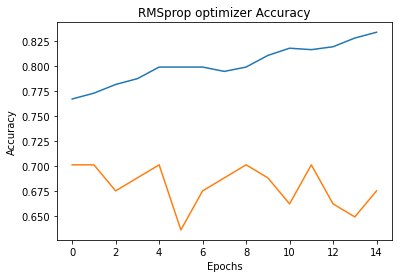

In [48]:
# plot accuracy
plt.plot(history_rmsprop.history['accuracy'], label='accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], label='val_accuracy')
plt.title("RMSprop optimizer Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

### Sgd - Stochastic Gradient Descent
##### Instead of taking entire data at one time, in SGD we take single record at a time to feed neural network and to update weights. SGD is updated more frequently, the cost function will have severe oscillations as we can see in the figure. The oscillation of SGD may jump to a better local minimum.


In [ ]:
# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

In [49]:
# define model
model_sgd = models.Sequential()
model_sgd.add(layers.Dense(100, activation="relu"))
model_sgd.add(layers.Dense(50, activation="relu"))
model_sgd.add(layers.Dense(25, activation="relu"))
model_sgd.add(layers.Dense(12, activation="relu"))
model_sgd.add(layers.Dense(1, activation="sigmoid"))

In [50]:
# adam optimizer 
model_sgd.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

In [51]:
# train sgd model
history_sgd = model_sgd.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), validation_split=0.2)

Epoch 1/15
22/22 [==============================] - 1s 19ms/step - loss: 0.6574 - accuracy: 0.6556 - val_loss: 0.6322 - val_accuracy: 0.6623
Epoch 2/15
22/22 [==============================] - 0s 6ms/step - loss: 0.6377 - accuracy: 0.6512 - val_loss: 0.6152 - val_accuracy: 0.6623
Epoch 3/15
22/22 [==============================] - 0s 7ms/step - loss: 0.6207 - accuracy: 0.6512 - val_loss: 0.6010 - val_accuracy: 0.6753
Epoch 4/15
22/22 [==============================] - 0s 11ms/step - loss: 0.6042 - accuracy: 0.6556 - val_loss: 0.5875 - val_accuracy: 0.6753
Epoch 5/15
22/22 [==============================] - 0s 6ms/step - loss: 0.5889 - accuracy: 0.6628 - val_loss: 0.5749 - val_accuracy: 0.7013
Epoch 6/15
22/22 [==============================] - 0s 13ms/step - loss: 0.5736 - accuracy: 0.6802 - val_loss: 0.5632 - val_accuracy: 0.7403
Epoch 7/15
22/22 [==============================] - 0s 7ms/step - loss: 0.5586 - accuracy: 0.6932 - val_loss: 0.5541 - val_accuracy: 0.7662
Epoch 8/15
22/22 

Text(0, 0.5, 'Accuracy')

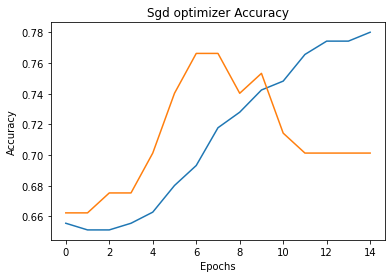

In [52]:
# plot accuracy
plt.plot(history_sgd.history['accuracy'], label='accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='val_accuracy')
plt.title("Sgd optimizer Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")